# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
url = "http://api.openweathermap.org/data/2.5/weather?"
Columns = ["City", "Country", "Temp", "Lat", "Long", "Humidity", "Cloudiness", "Wind Speed"]
CitiesDf = pd.DataFrame(columns=Columns)
Rowz = 1
for row in cities:
    #TCity = cities["City"]["row"]
    TUrl = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + row
    CityData = requests.get(TUrl).json()
    if CityData["cod"] =="404":
        print("no city found")
#     else:
#         print(CityData)
        
    else:
        CitiesDf.set_value(Rowz, "City", CityData["name"])
        CitiesDf.set_value(Rowz, "Country", CityData["sys"]["country"])
        CitiesDf.set_value(Rowz, "Temp", CityData["main"]["temp"])
        CitiesDf.set_value(Rowz, "Lat", CityData["coord"]["lat"])
        CitiesDf.set_value(Rowz, "Long", CityData["coord"]["lat"])
        CitiesDf.set_value(Rowz, "Humidity", CityData["main"]["humidity"])
        CitiesDf.set_value(Rowz, "Cloudiness", CityData["clouds"]["all"])
        CitiesDf.set_value(Rowz, "Wind Speed", CityData["wind"]["speed"])
        print(Rowz, CityData["name"], CityData["sys"]["country"])
        print(TUrl)
        Rowz = Rowz + 1
    

C:\Users\awind\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\awind\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\awind\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\awind\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\awind\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please

1 Kruisfontein ZA
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=kruisfontein
2 Hermanus ZA
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=hermanus
3 Nanortalik GL
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=nanortalik
4 Punta Arenas CL
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=punta arenas
5 Thompson CA
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=thompson
6 Tarko-Sale RU
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=tarko-sale
7 Joshimath IN
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=joshimath
8 Petukhovo RU
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe76570

65 Hilo US
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=hilo
66 San Patricio PY
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=san patricio
no city found
67 Te Anau NZ
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=te anau
68 Leopold US
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=leopold
69 Atuona PF
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=atuona
no city found
70 Ambilobe MG
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=ambilobe
71 Castro CL
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=castro
72 Vao EE
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827

129 Ballina IE
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=ballina
no city found
130 Broome GB
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=broome
no city found
131 Sao Jose da Coroa Grande BR
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=sao jose da coroa grande
132 Cabinda AO
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=cabinda
133 Reus ES
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=reus
134 Mahebourg MU
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=mahebourg
135 Beringovskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=beringovskiy
136 Kodiak US
http://api.openweathermap.org/data/2

192 Narsaq GL
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=narsaq
193 Malanje AO
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=malanje
no city found
194 Gambela ET
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=gambela
no city found
195 Viedma AR
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=viedma
196 Garachine PA
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=garachine
no city found
197 Haines Junction CA
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=haines junction
198 Kefamenanu ID
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=kefamenanu
199 Anadyr RU
http://api.openweathermap.org/data/2.5/w

255 Murdochville CA
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=murdochville
256 Katsuura JP
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=katsuura
257 Berlevag NO
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=berlevag
no city found
258 Vanavara RU
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=vanavara
259 Brookhaven US
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=brookhaven
260 Tiarei PF
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=tiarei
no city found
261 Hamilton BM
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=hamilton
262 Canchungo GW
http://api.openweathermap.org/data/2.5/weather?appi

318 Segezha RU
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=segezha
319 Kokkola FI
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=kokkola
320 Tuatapere NZ
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=tuatapere
321 Pangnirtung CA
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=pangnirtung
322 Tazmalt DZ
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=tazmalt
no city found
323 Colmar FR
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=colmar
324 Simao CN
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=simao
325 General Cepeda MX
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657

381 Rawson AR
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=rawson
382 Naze NG
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=naze
no city found
383 Belyy Yar RU
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=belyy yar
384 Ahipara NZ
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=ahipara
385 Cockburn Town TC
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=cockburn town
386 Malartic CA
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=malartic
387 Dodge City US
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=dodge city
388 Kabarnet KE
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe

444 Lesnoy RU
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=lesnoy
445 Denizli TR
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=denizli
446 Terrace Bay CA
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=terrace bay
447 Luqiao CN
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=luqiao
448 Epe DE
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=epe
449 Kidal ML
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=kidal
no city found
450 Turukhansk RU
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=turukhansk
451 Tarakan ID
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units

508 Midland US
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=midland
509 Vernon CA
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=vernon
510 Bandarbeyla SO
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=bandarbeyla
511 North Bend US
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=north bend
no city found
512 Agen FR
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=agen
513 Tonneins FR
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=tonneins
514 Frejlev DK
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4f827&units=IMPERIAL&q=frejlev
515 Itarema BR
http://api.openweathermap.org/data/2.5/weather?appid=d89b2c78b08362d4ffe7657029e4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
CitiesDf.to_csv("CitiesDf.csv")

In [38]:
CitiesDf

,City,Country,Temp,Lat,Long,Humidity,Cloudiness,Wind Speed
1,Kruisfontein,ZA,61.5,-34,-34,90,100,5.39
2,Hermanus,ZA,63,-34.42,-34.42,98,88,3.38
3,Nanortalik,GL,31.53,60.14,60.14,95,88,4.27
4,Punta Arenas,CL,42.44,-53.16,-53.16,75,90,28.86
5,Thompson,CA,41,55.74,55.74,25,20,2.82
6,Tarko-Sale,RU,21,64.92,64.92,85,80,5.99
7,Joshimath,IN,19.29,30.57,30.57,100,0,1.48
8,Petukhovo,RU,47.91,55.06,55.06,55,0,9.64
9,Chuy,UY,58.53,-33.69,-33.69,93,0,7.96
10,Yellowknife,CA,41.07,62.45,62.45,60,75,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

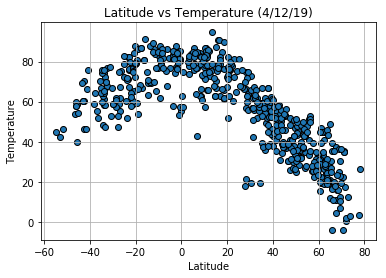

In [39]:
Latx = CitiesDf["Lat"]
Tempy = CitiesDf["Temp"]
plt.scatter(Latx, Tempy, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature (4/12/19)")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

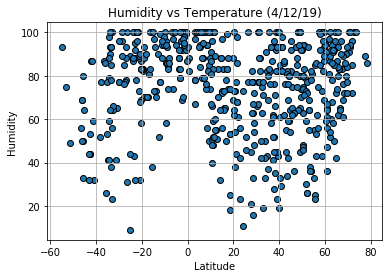

In [40]:
Humy = CitiesDf["Humidity"]
plt.scatter(Latx, Humy, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Temperature (4/12/19)")
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

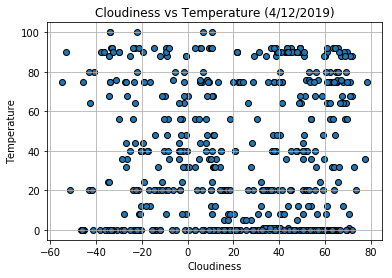

In [41]:
Cloudy = CitiesDf["Cloudiness"]
plt.scatter(Latx, Cloudy, edgecolor="black")
plt.xlabel("Cloudiness")
plt.ylabel("Temperature")
plt.title("Cloudiness vs Temperature (4/12/2019)")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

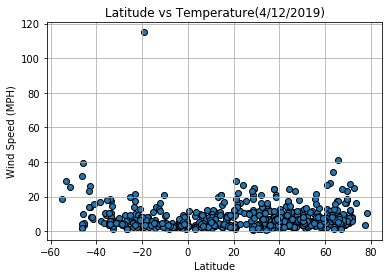

In [42]:
Windy = CitiesDf["Wind Speed"]
plt.scatter(Latx, Windy, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude vs Temperature(4/12/2019)")
plt.grid(True)
plt.show()